<a href="https://colab.research.google.com/github/hagijakobson/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation for Marketing Strategy

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Dataset

In [5]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [6]:
creditcard_df.shape

(8950, 18)

In [7]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [12]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Data Cleaning

### Dealing with missing values

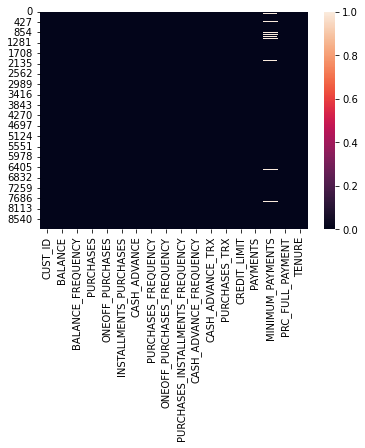

In [13]:
sns.heatmap(creditcard_df.isnull());

In [14]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [16]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [17]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [18]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [19]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

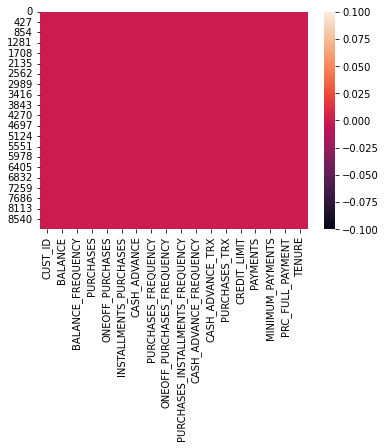

In [20]:
sns.heatmap(creditcard_df.isnull());

### Dealing with duplicate records

In [21]:
creditcard_df.duplicated().sum()

0

### Drop ID column

In [22]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [23]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploratory Data Analysis

In [24]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [25]:
len(creditcard_df.columns)

17

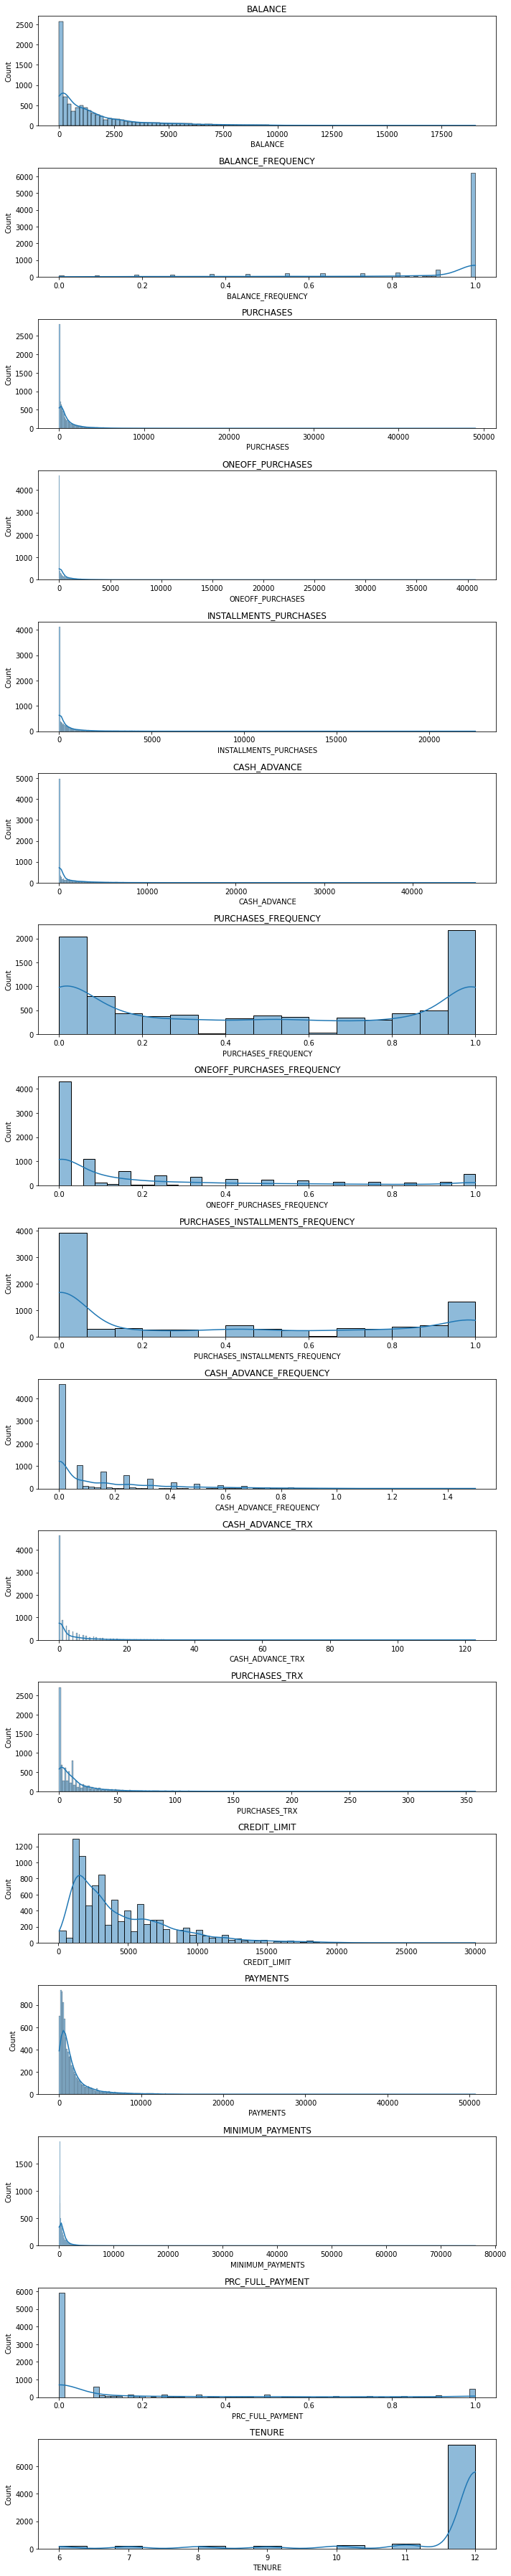

In [26]:
fig, axes = plt.subplots(17, 1,figsize=(10,50))
i = 0
for column in creditcard_df.columns:
    sns.histplot(data=creditcard_df, x=column, kde = True, ax=axes[i])
    axes[i].title.set_text(column)
    #plt.title(column)
    i+=1
plt.tight_layout();

In [27]:
correlations = creditcard_df.corr()

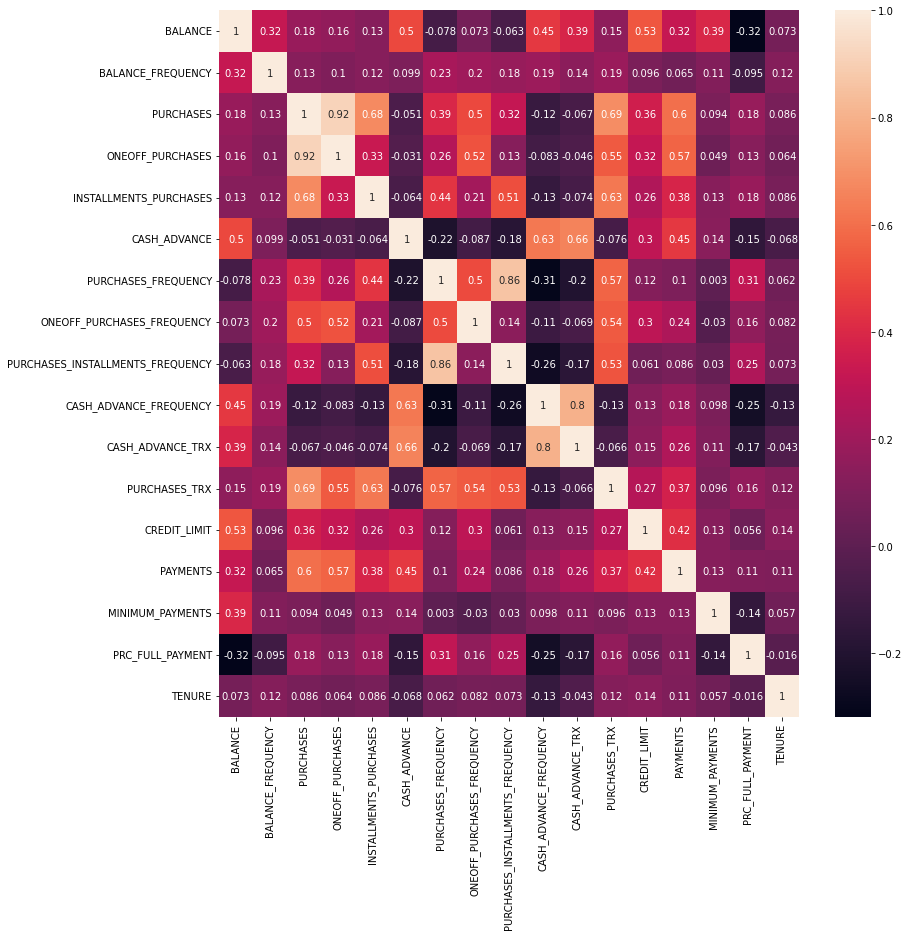

In [31]:
f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlations, annot=True);

## Setting the number of clusters using the Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [32]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [33]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [34]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [35]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [36]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [37]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

In [38]:
print(wcss_1)

[152149.99999999983, 127784.97295116563, 111986.67030483478, 99074.38579876853, 91502.98259428913, 84852.45265384734, 79532.32854113297, 74624.71643963648, 70912.03718053618, 66612.88069130576, 63632.69399317633, 61385.68335343433, 59144.75813037434, 57496.22622655931, 55939.22891302142, 54420.82354956913, 53443.5199973243, 51885.53540003458, 51001.35812790053]


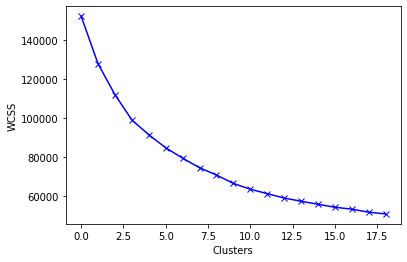

In [39]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels, len(labels)

(array([1, 5, 2, ..., 7, 7, 7], dtype=int32), 8950)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([  30, 2723, 1098, 1182, 2017,  854,  423,  623]))

In [ ]:
kmeans.cluster_centers_

array([[ 1.92305052e+00,  3.37716867e-01,  1.12120418e+01,
         1.06003671e+01,  7.03311838e+00,  4.19625127e-01,
         1.04698328e+00,  1.91550149e+00,  9.81333653e-01,
        -2.58911831e-01,  6.12285458e-02,  5.36243850e+00,
         3.04406408e+00,  8.09897492e+00,  1.12031761e+00,
         1.11013157e+00,  3.10863465e-01],
       [ 2.13260681e-02,  4.04280346e-01, -3.62477709e-01,
        -2.47605736e-01, -4.02065577e-01, -8.20602880e-02,
        -8.69270503e-01, -4.11538361e-01, -7.60078739e-01,
         1.20718095e-01, -1.68809079e-02, -4.87672984e-01,
        -3.02563377e-01, -2.46389048e-01, -7.86810339e-03,
        -4.56117254e-01,  2.71800637e-01],
       [-1.61258422e-01,  3.91840745e-01,  4.53685136e-01,
         5.93268355e-01, -1.73604682e-02, -3.32048429e-01,
         9.41220401e-01,  1.87419266e+00,  8.95637854e-02,
        -4.06120911e-01, -3.22193759e-01,  5.24384905e-01,
         3.77442273e-01,  8.74959012e-02, -1.61829631e-01,
         4.03800394e-01,  2.6

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
1,0.021326,0.404280,-0.362478,-0.247606,-0.402066,-0.082060,-0.869271,-0.411538,-0.760079,0.120718,-0.016881,-0.487673,-0.302563,-0.246389,-0.007868,-0.456117,0.271801
2,-0.161258,0.391841,0.453685,0.593268,-0.017360,-0.332048,0.941220,1.874193,0.089564,-0.406121,-0.322194,0.524385,0.377442,0.087496,-0.161830,0.403800,0.260639
3,-0.701222,-2.139409,-0.310833,-0.235565,-0.302072,-0.322522,-0.555428,-0.443021,-0.439828,-0.521634,-0.376396,-0.419502,-0.177998,-0.202299,-0.257071,0.280448,0.202001
4,-0.365137,0.333796,-0.038116,-0.244632,0.359119,-0.365206,0.989403,-0.387783,1.205120,-0.476468,-0.362065,0.186694,-0.261209,-0.217979,-0.033097,0.312594,0.257739
5,1.708070,0.393276,-0.214812,-0.154147,-0.224792,2.035206,-0.469060,-0.208757,-0.407838,1.928463,1.951748,-0.262532,1.038472,0.833523,0.562707,-0.391581,0.069501
6,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
7,-0.336717,-0.351618,-0.289556,-0.216192,-0.287105,0.068131,-0.204713,-0.289287,-0.225660,0.308086,0.000466,-0.388444,-0.566467,-0.392990,-0.208809,0.013145,-3.202809


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
1,1608.863238,0.973041,228.765620,181.462562,47.484732,806.786855,0.141470,0.079688,0.062363,0.159301,3.133627,2.588106,3393.600098,1019.871700,845.870259,0.020308,11.881057
2,1228.829033,0.970094,1972.510118,1577.141330,395.368789,282.550045,0.868108,0.761566,0.400032,0.053875,1.050091,27.744080,5867.738864,1986.435913,487.069414,0.271819,11.866120
3,104.939796,0.370465,339.104814,201.448528,137.907386,302.527006,0.267430,0.070296,0.189639,0.030760,0.680203,4.282572,3846.818481,1147.508187,265.114438,0.235741,11.787648
4,804.472661,0.956344,921.770263,186.398622,735.814296,213.016675,0.887446,0.086775,0.843383,0.039798,0.777998,19.350347,3544.063529,1102.115657,787.076376,0.245143,11.862240
5,5119.677779,0.970434,544.255880,336.584601,207.790610,5246.793730,0.302094,0.140181,0.202352,0.521049,16.568075,8.184272,8272.833974,4146.110617,2175.571917,0.039184,11.610329
6,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
7,863.627544,0.793976,384.563451,233.602408,151.442584,1121.745122,0.408189,0.116158,0.274754,0.196795,3.252006,5.054575,2433.410031,595.475430,377.585275,0.157559,7.231140


In [ ]:
labels, len(labels)

(array([1, 5, 2, ..., 7, 7, 7], dtype=int32), 8950)

In [ ]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


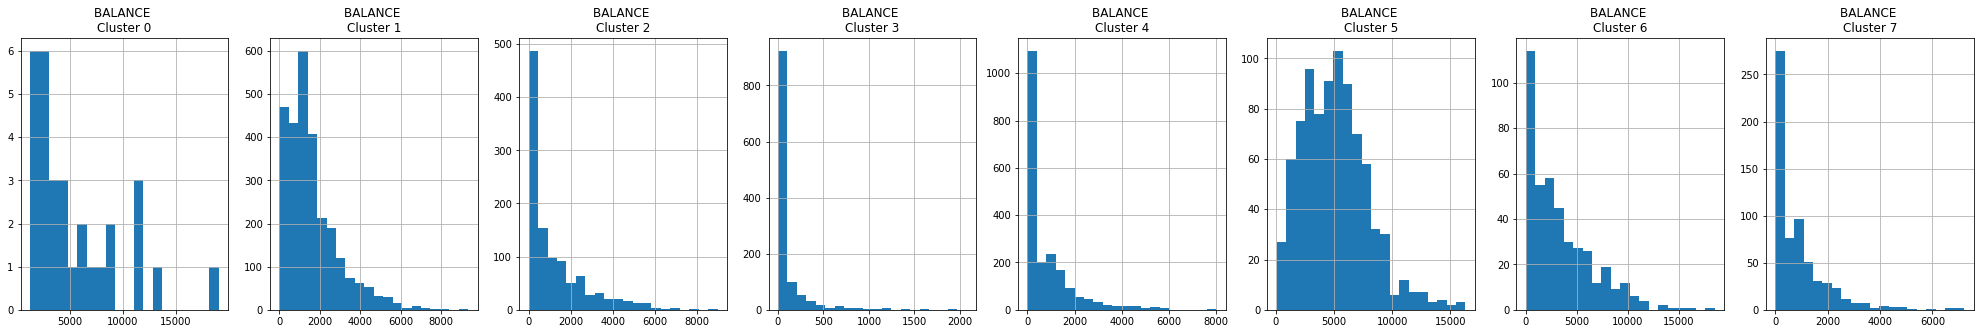

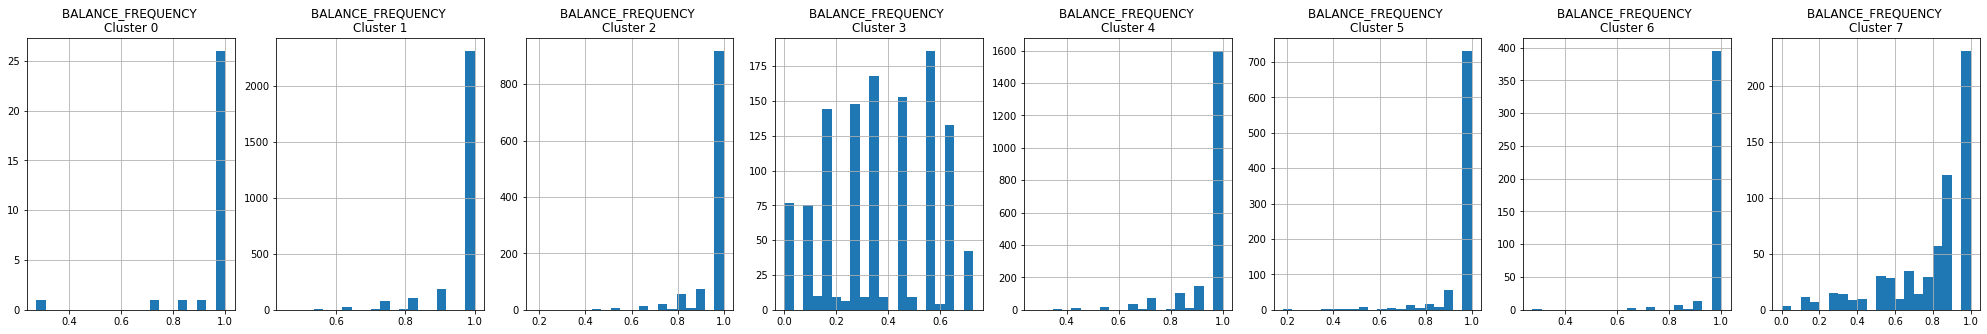

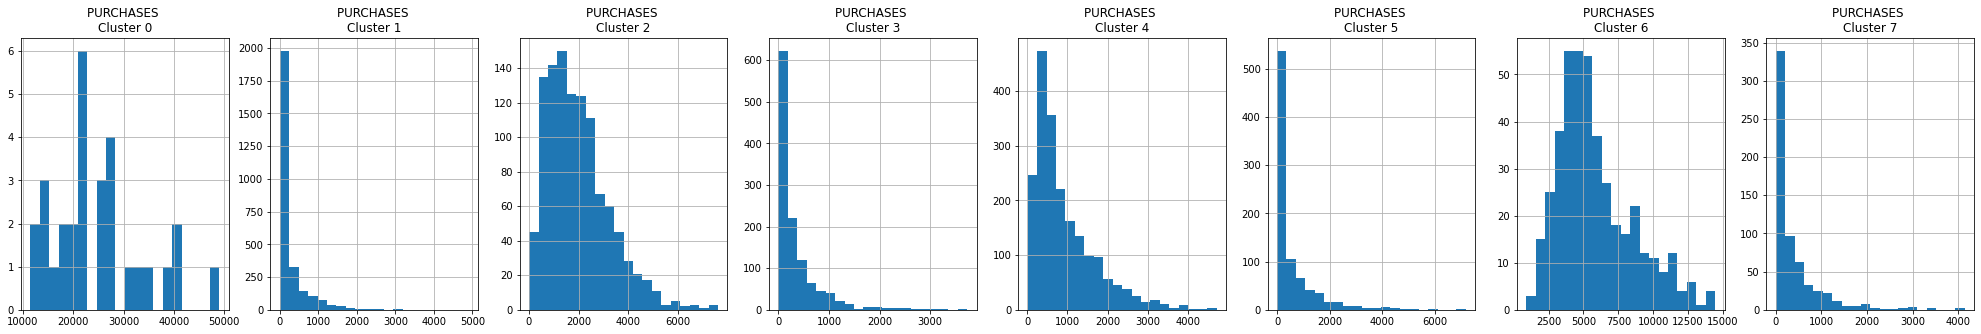

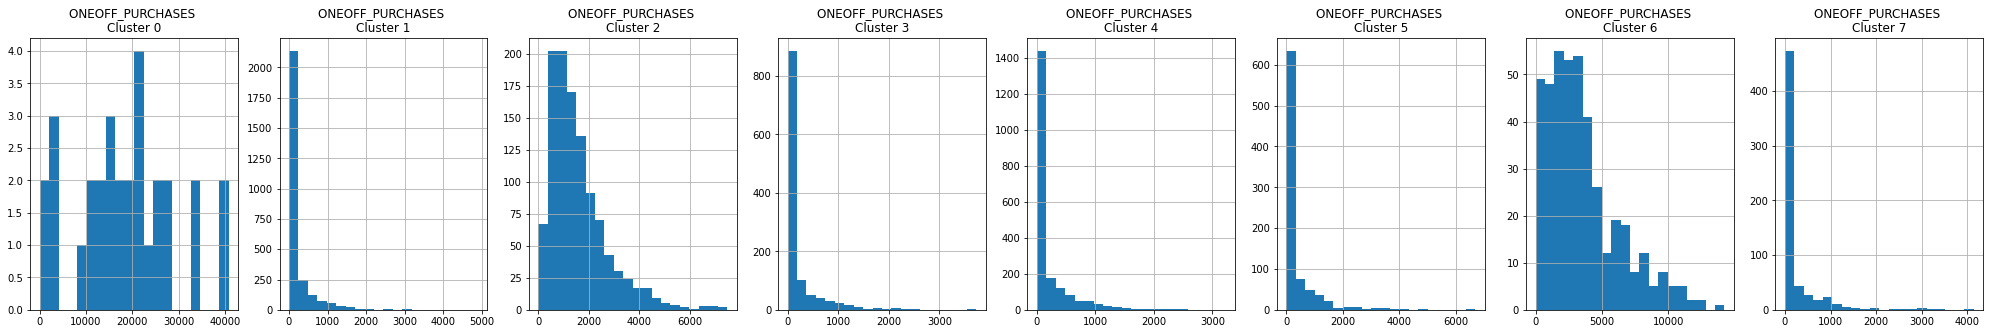

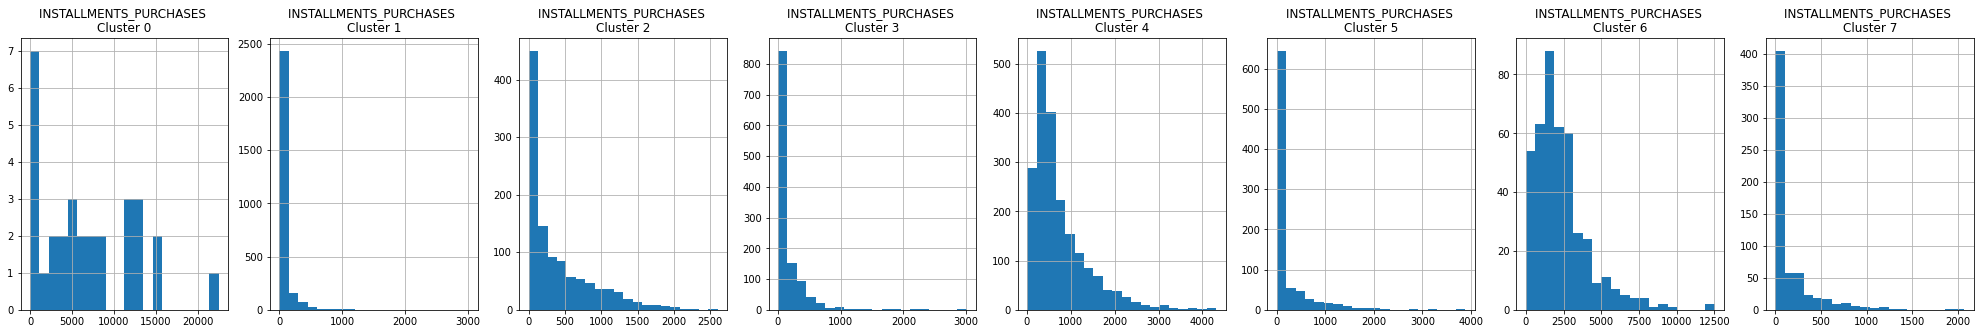

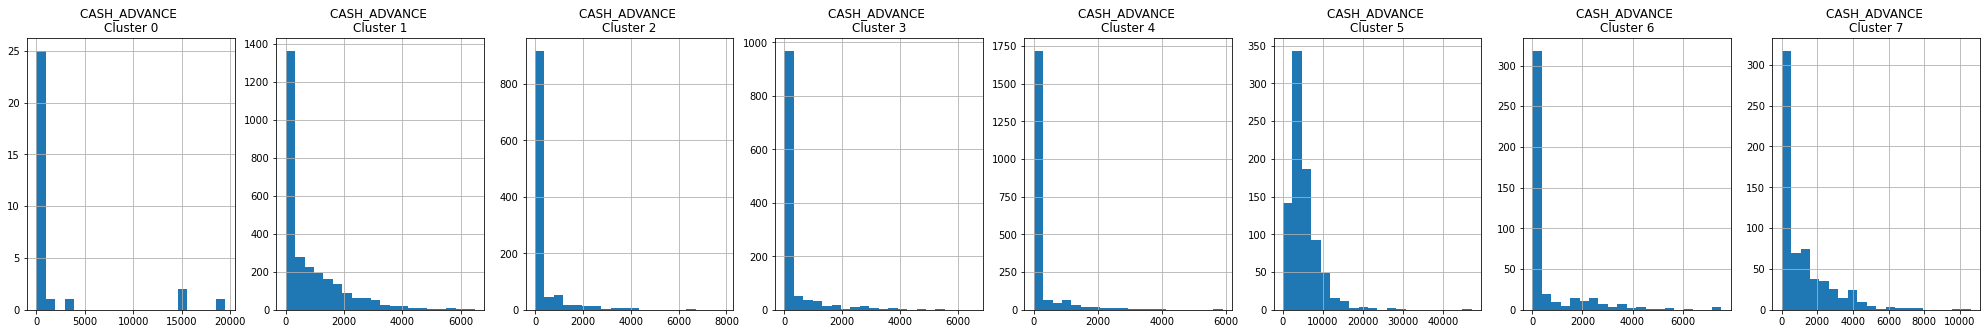

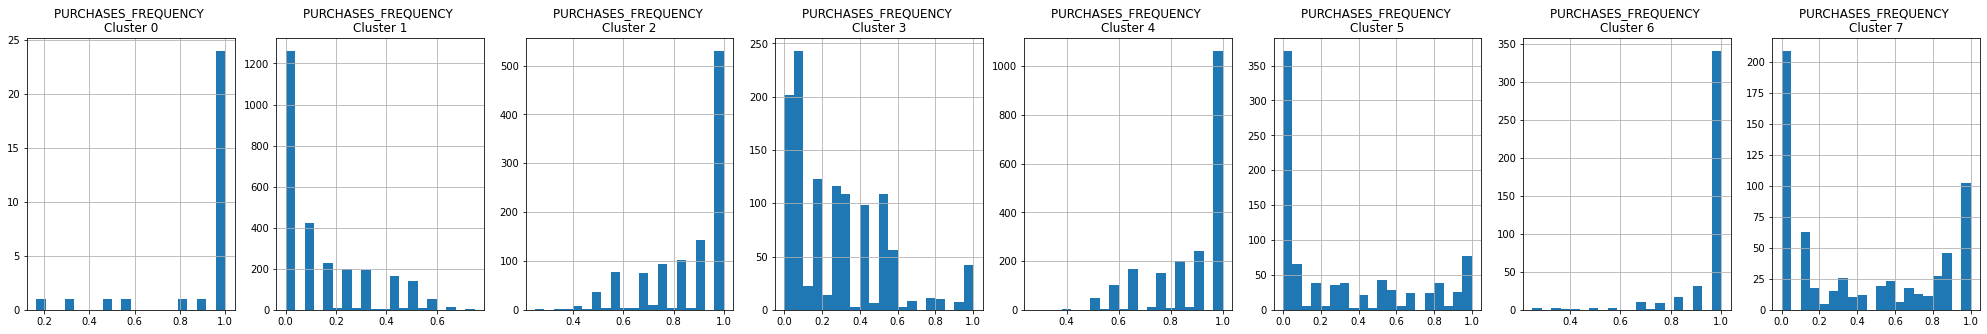

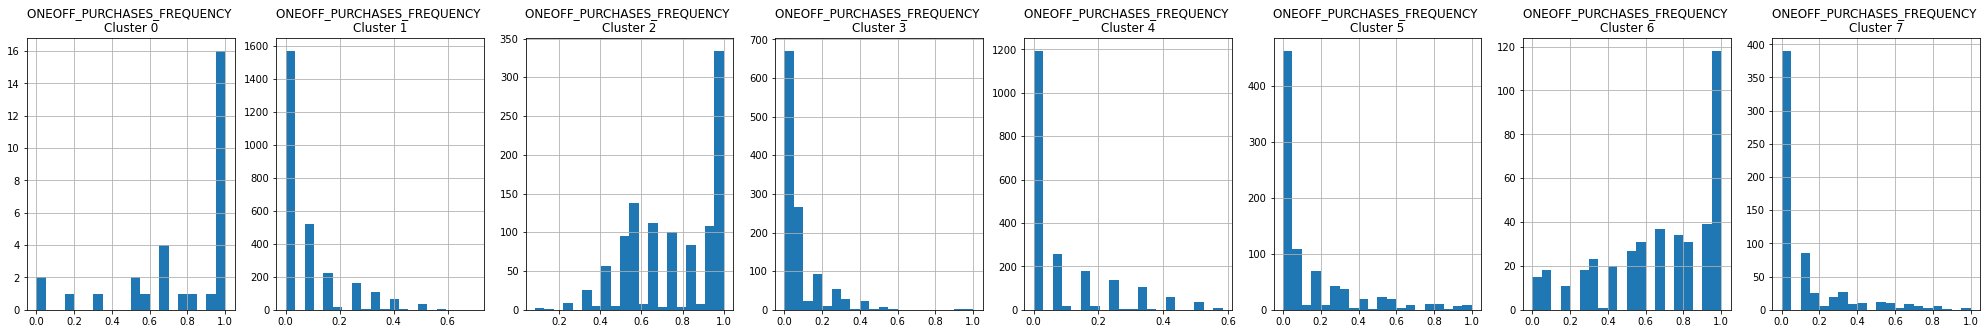

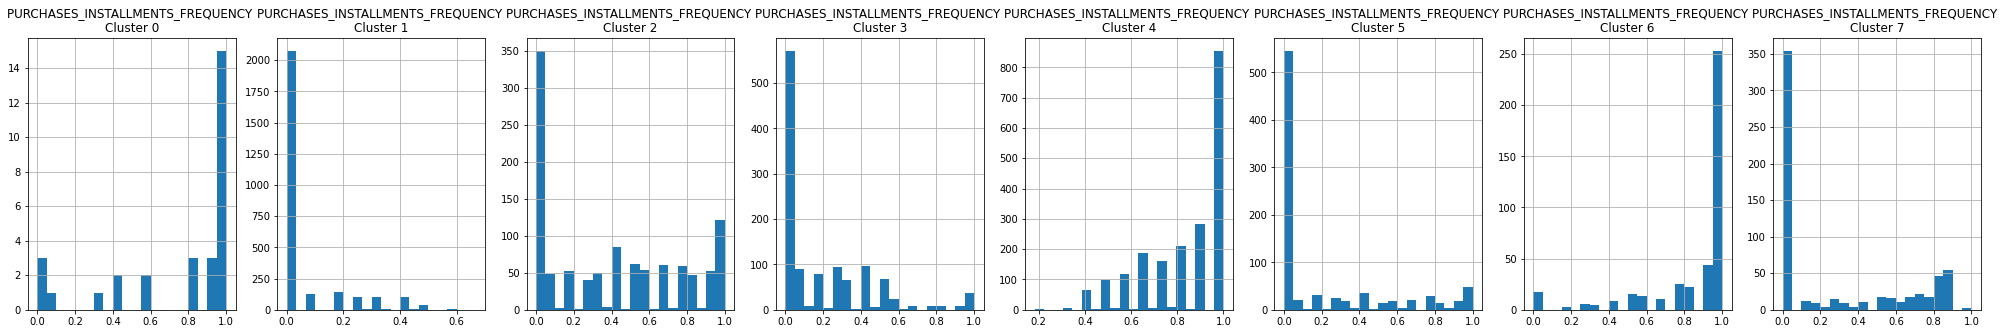

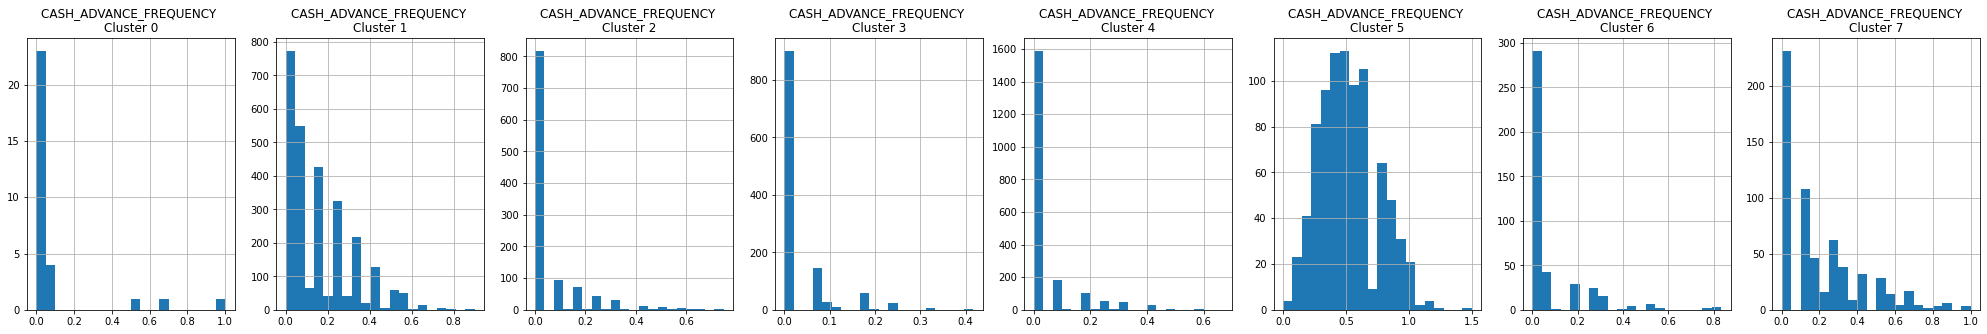

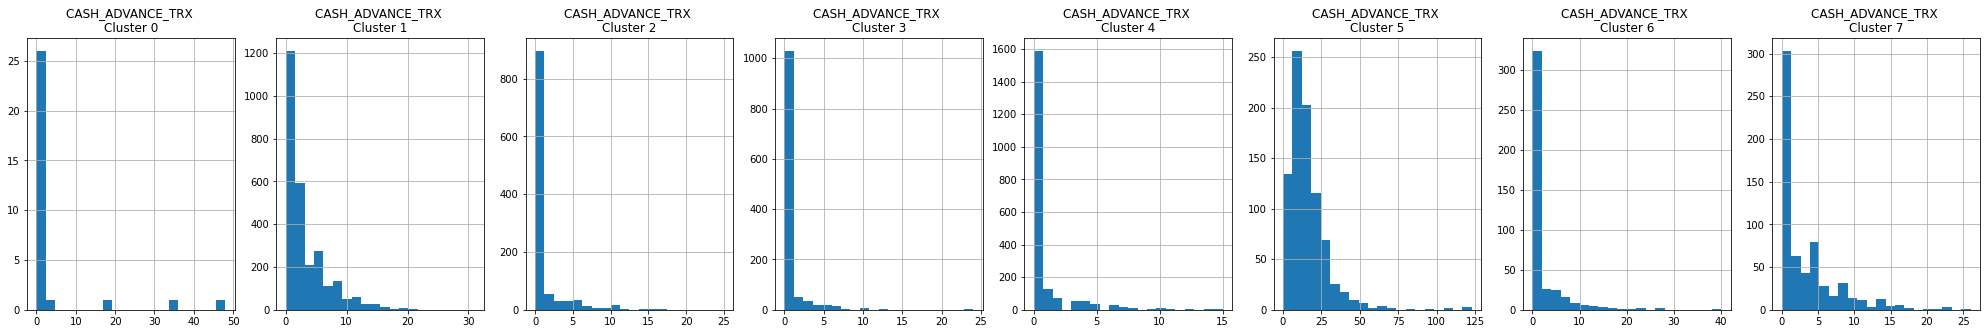

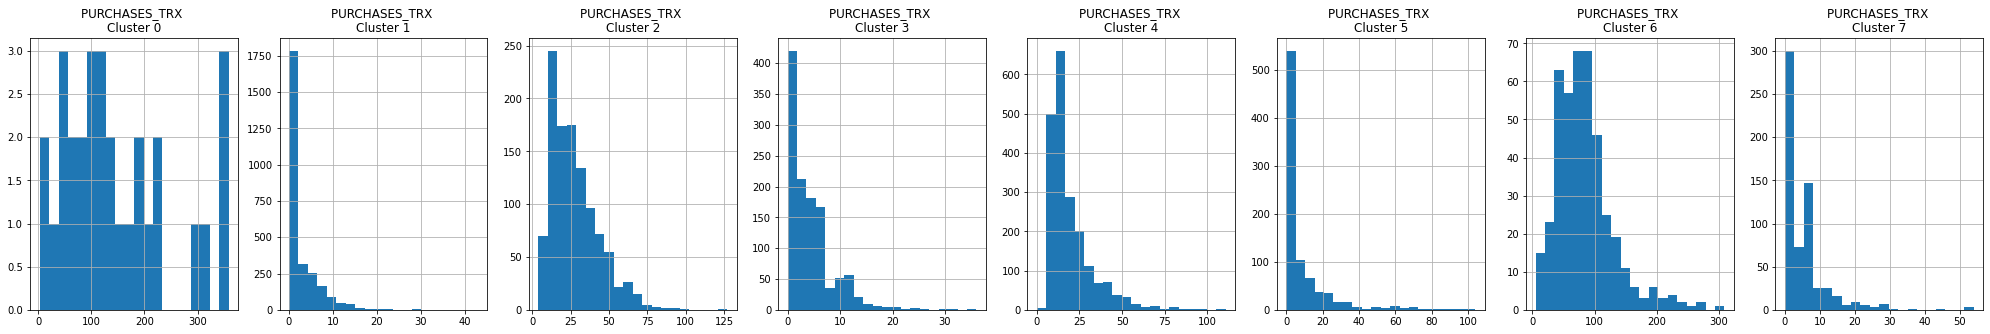

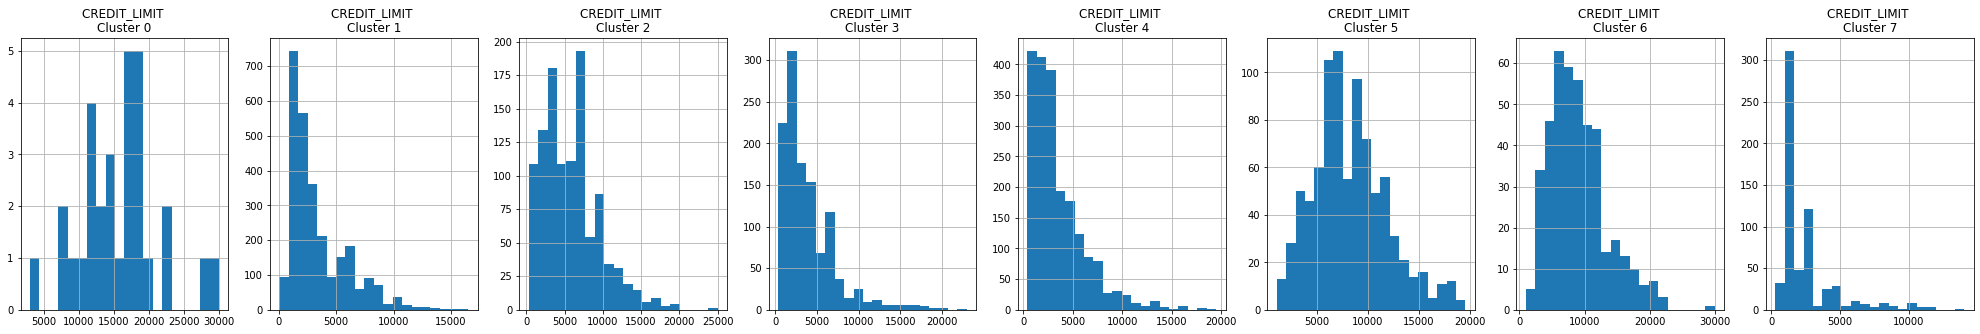

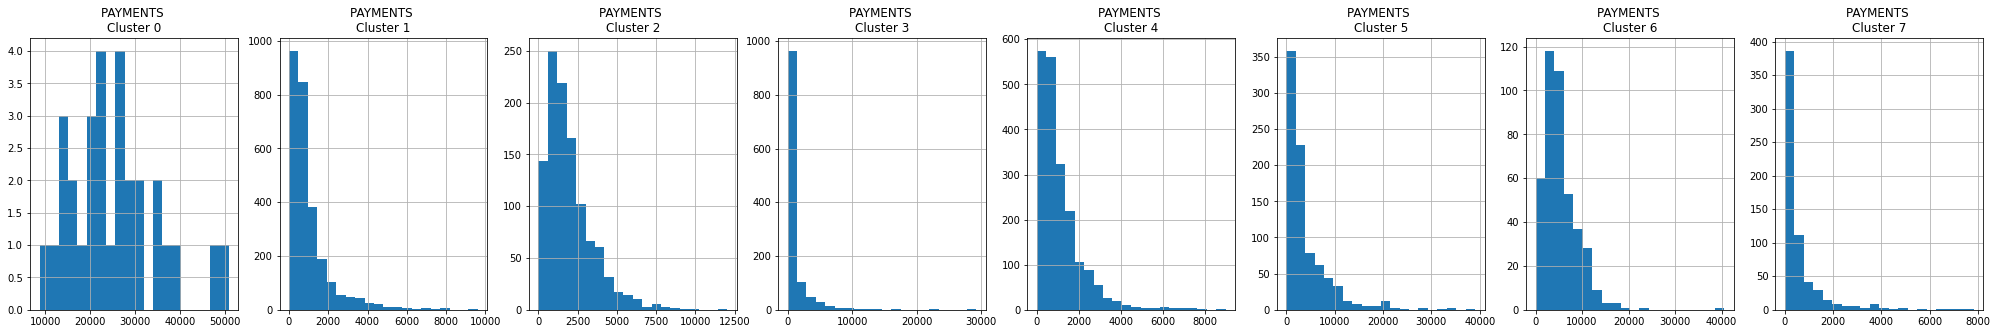

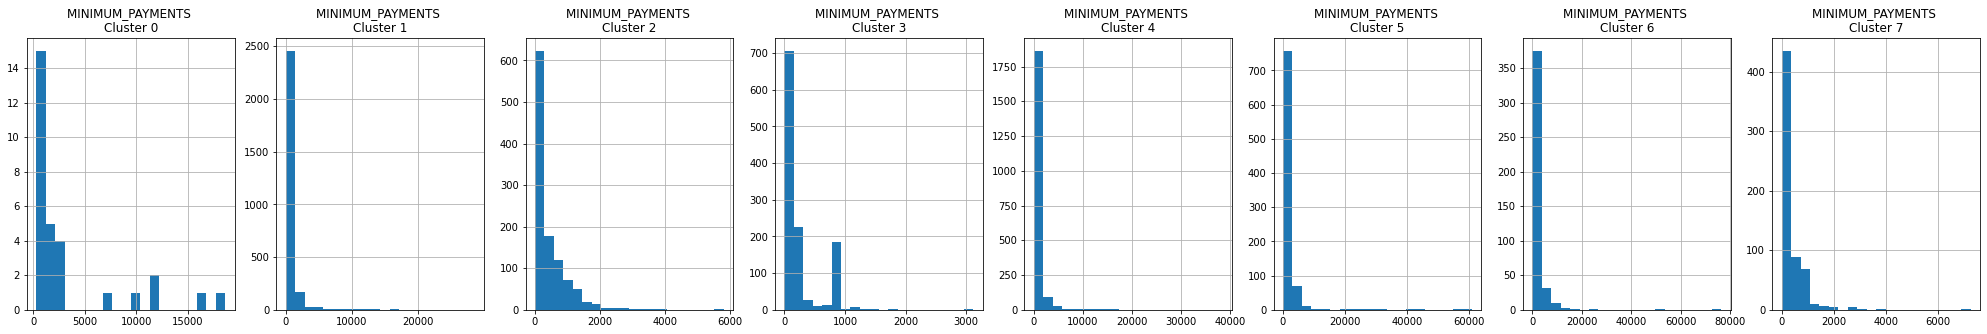

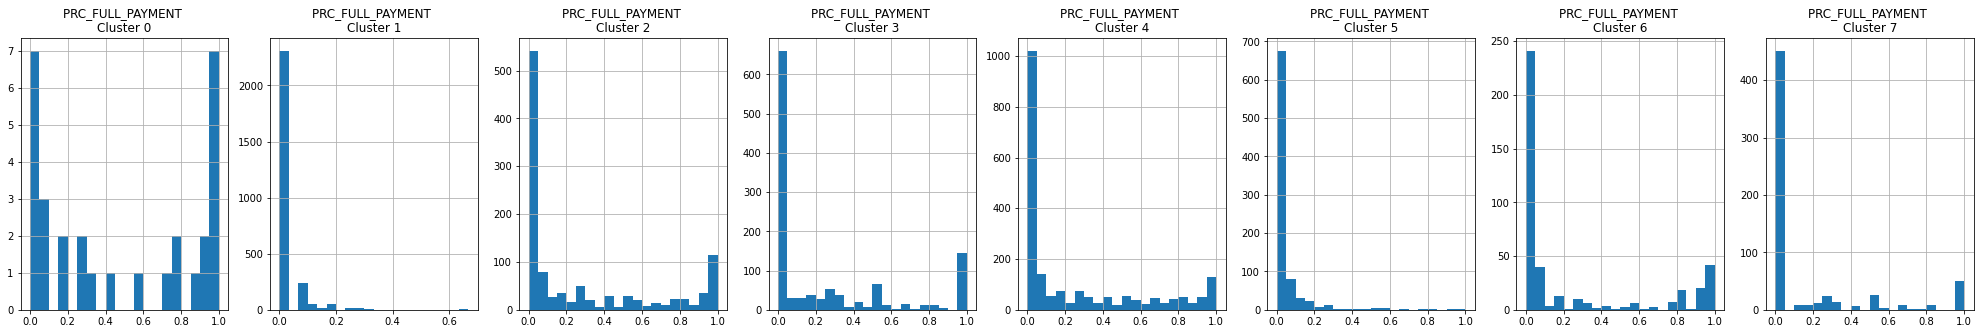

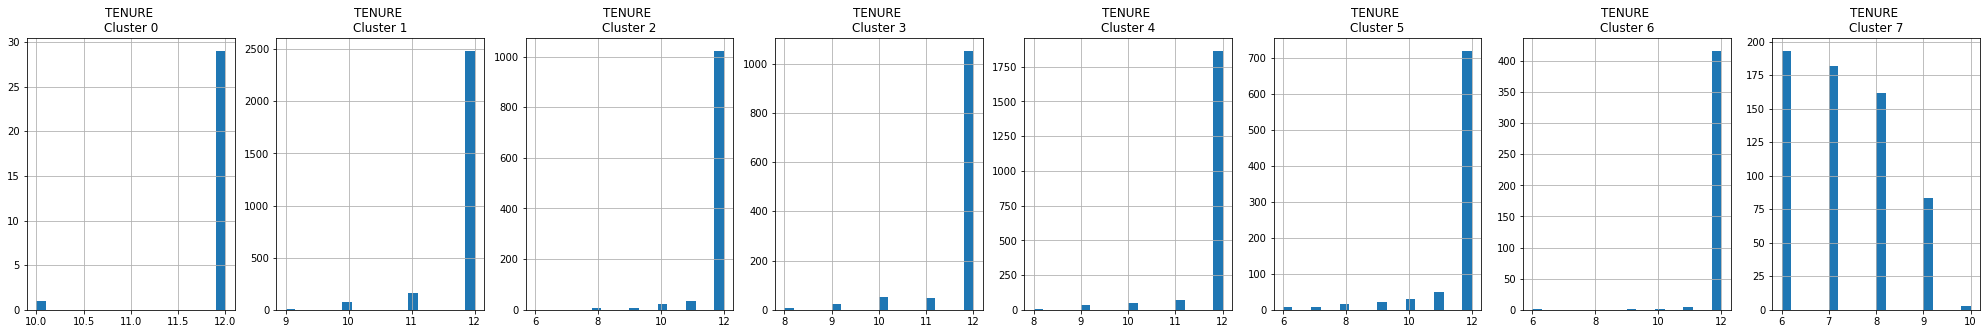

In [ ]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [ ]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
587,2492.726282,1.0,27957.68,23032.97,4924.71,0.0,1.0,1.0,0.916667,0.0,0,70,9000.0,27255.00752,537.372671,1.000000,12,0
1256,4010.621974,1.0,40040.71,24543.52,15497.19,0.0,1.0,1.0,1.000000,0.0,0,358,18000.0,33994.72785,703.503256,1.000000,12,0
3652,8700.079439,1.0,20421.59,16864.56,3557.03,0.0,1.0,1.0,1.000000,0.0,0,204,17000.0,13002.30393,2746.592199,0.083333,12,0
1190,1893.611922,1.0,22746.81,15795.42,6951.39,0.0,1.0,1.0,1.000000,0.0,0,140,18000.0,22558.28457,505.125031,1.000000,12,0
1447,8151.985277,1.0,25615.07,25122.77,492.30,0.0,1.0,1.0,0.583333,0.0,0,56,17000.0,17575.20083,2465.465414,0.166667,12,0


In [ ]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7987,3542.074874,1.000000,884.98,0.00,884.98,4547.294728,1.000000,0.000000,0.833333,0.500000,5,14,5000.0,958.998587,1081.645567,0.0,6,7
7985,1200.937942,0.833333,0.00,0.00,0.00,1981.157622,0.000000,0.000000,0.000000,0.500000,4,0,2000.0,152.106361,200.106261,0.0,6,7
6370,2300.825677,0.875000,522.06,0.00,522.06,2809.026116,0.875000,0.000000,0.750000,0.125000,1,7,3000.0,469.928446,1711.018102,0.0,8,7
8459,64.343051,0.666667,281.05,0.00,281.05,0.000000,0.666667,0.000000,0.666667,0.000000,0,5,1500.0,82.611456,84.360572,0.0,6,7
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,7


In [ ]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221956, -1.07645221],
       [-1.13829179,  2.50646767],
       [ 0.9696794 , -0.38348855],
       ...,
       [-0.92620378, -1.81078607],
       [-2.33655062, -0.65797757],
       [-0.55642385, -0.40046368]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138292,2.506468
2,0.969679,-0.383489
3,-0.873627,0.043165
4,-1.599433,-0.688582


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076452,1
1,-1.138292,2.506468,5
2,0.969679,-0.383489,2
3,-0.873627,0.043165,1
4,-1.599433,-0.688582,1


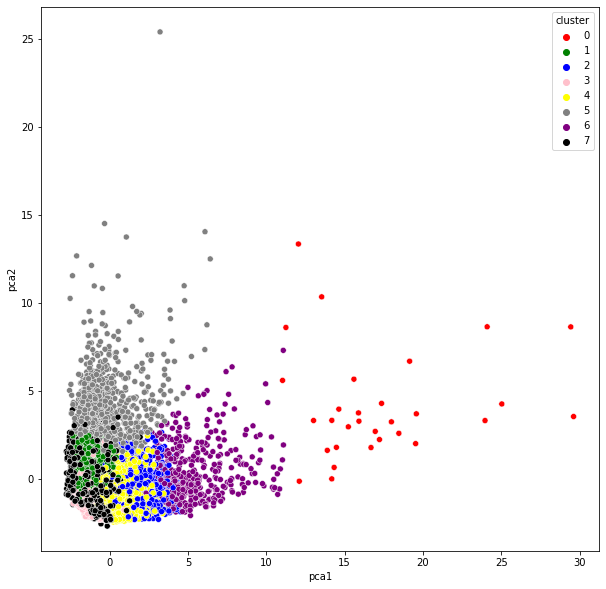

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [ ]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [ ]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [ ]:
# encoder
encoder = Model(input_df, encoded)

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 6s 23ms/step - loss: 0.1877
Epoch 2/50
280/280 [==============================] - 6s 22ms/step - loss: 0.1119
Epoch 3/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0691
Epoch 4/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0362
Epoch 5/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0424
Epoch 6/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0473
Epoch 7/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0392
Epoch 8/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0487
Epoch 9/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0356
Epoch 10/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0270
Epoch 11/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0310
Epoch 12/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0255
Epoch 13/50
2

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
compact = encoder.predict(creditcard_df_scaled)

In [ ]:
compact.shape

(8950, 10)

In [ ]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [ ]:
compact[0]

array([0.        , 0.6033399 , 0.77557904, 1.7938616 , 0.        ,
       0.8507013 , 0.67095315, 0.3378452 , 0.28809083, 0.63638765],
      dtype=float32)

In [ ]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

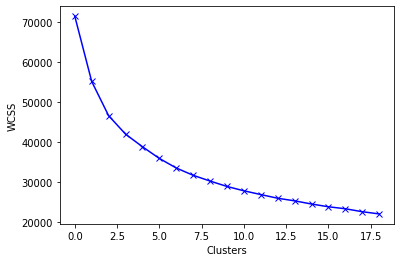

In [ ]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

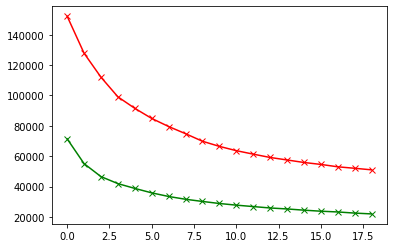

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 1, 1, ..., 2, 2, 2], dtype=int32), (8950,))

In [ ]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.821048,-0.241919
1,0.394212,-1.073047
2,-1.860561,0.486894
3,0.129551,-0.059802
4,-0.874028,-0.169197


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.821048,-0.241919,1
1,0.394212,-1.073047,1
2,-1.860561,0.486894,1
3,0.129551,-0.059802,1
4,-0.874028,-0.169197,1


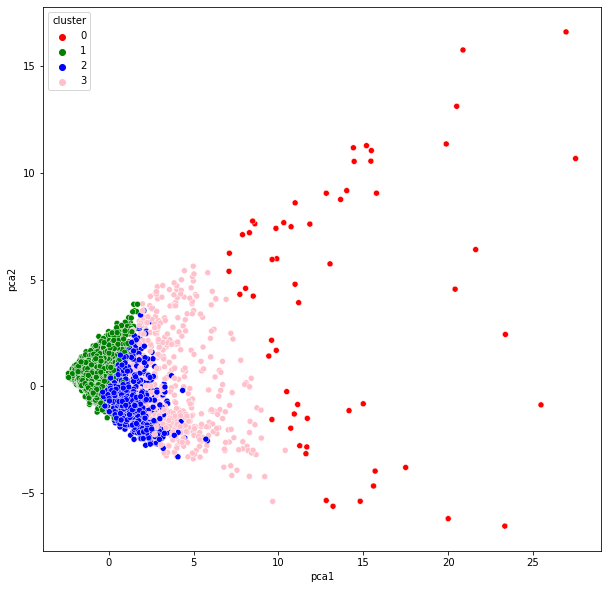

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [ ]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1604,3391.702180,1.000000,38902.71,33803.84,5098.87,0.00000,1.000000,1.000000,1.000000,0.0,0,195,18000.0,35843.62593,716.027656,1.000000,12,0
2823,11642.601560,1.000000,15108.47,2370.00,12738.47,0.00000,1.000000,0.500000,1.000000,0.0,0,298,12000.0,16005.45204,11652.565110,0.000000,12,0
4220,1268.809031,0.272727,17945.00,17945.00,0.00,0.00000,0.166667,0.166667,0.000000,0.0,0,3,18000.0,50721.48336,1149.747342,0.000000,12,0
1447,8151.985277,1.000000,25615.07,25122.77,492.30,0.00000,1.000000,1.000000,0.583333,0.0,0,56,17000.0,17575.20083,2465.465414,0.166667,12,0
4515,6956.376540,1.000000,11500.94,3091.01,8409.93,15133.53213,1.000000,1.000000,1.000000,1.0,48,308,14000.0,20122.00545,1617.014574,0.166667,12,0


In [ ]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5139,5861.100691,1.0,64.71,64.71,0.00,9799.529884,0.083333,0.083333,0.0,0.583333,35,2,9000.0,7371.459399,2791.366849,0.083333,12,3
6408,2184.965504,1.0,0.00,0.00,0.00,2893.023143,0.000000,0.000000,0.0,0.916667,26,0,8000.0,1730.364781,481.160634,0.000000,12,3
5134,2933.068755,1.0,0.00,0.00,0.00,7542.177658,0.000000,0.000000,0.0,0.833333,20,0,10000.0,2201.097670,612.068106,0.000000,12,3
2576,5097.916969,1.0,139.67,139.67,0.00,3365.390269,0.500000,0.500000,0.0,0.250000,22,6,6000.0,3313.162847,2759.803770,0.000000,12,3
2345,5925.120611,1.0,1763.89,258.43,1505.46,0.000000,1.000000,0.250000,1.0,0.000000,0,195,6500.0,2557.841292,2268.544117,0.000000,12,3


In [ ]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')